In [23]:
import pandas as pd
import seaborn as sns

Загрузите данные по вариантам в ноутбук.

In [11]:
data=pd.read_excel('Вариант 1.xlsx',header=2)
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.000000,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.000000,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3047,3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0


Сделайте описательную статистику полученных данных.

In [12]:
ds = data.describe()
ds

,№,№ школы,Номер варианта,Первичный балл,Балл,Минимальный балл
count,3048.000000,3048.000000,3048.000000,3048.000000,3049.000000,3048.0
mean,1524.500000,138.753281,340.787730,43.573491,72.769029,24.0
std,880.026136,41.793413,39.077186,8.931816,13.662666,0.0
min,1.000000,104.000000,101.000000,8.000000,20.000000,24.0
25%,762.750000,126.000000,339.000000,38.000000,64.000000,24.0
50%,1524.500000,144.000000,342.000000,45.000000,72.000000,24.0
75%,2286.250000,148.000000,346.000000,50.000000,82.000000,24.0
max,3048.000000,1106.000000,706.000000,58.000000,100.000000,24.0


Найдите процент учащихся, выполнивших работу ниже среднего

In [15]:
data['Балл'] = pd.to_numeric(data['Балл'], errors='coerce')
average = data['Балл'].mean()
below_average = data[data['Балл'] < average].shape[0]
total_students = data.shape[0]
percentage = (below_average / total_students) * 100
percentage

51.26270908494588

Найти процент учащихся не сдавших экзамен.

In [17]:
m = pd.to_numeric(data['Минимальный балл'].iloc[0], errors='coerce')
students_failed = data[data['Балл'] < m].shape[0]
percentage_failed = (students_failed / total_students) * 100
percentage_failed

0.13119055428009183

Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

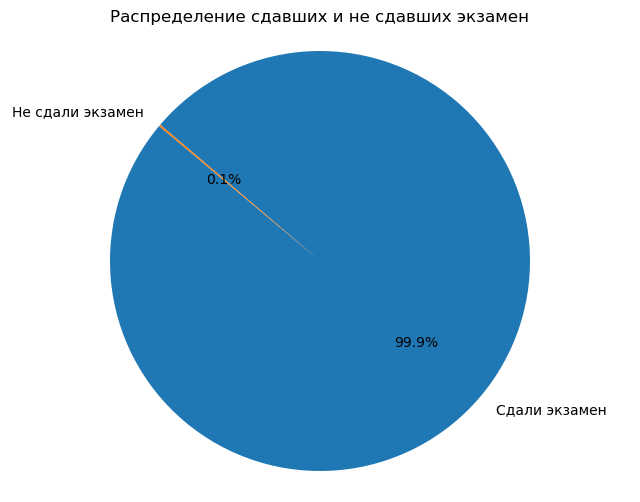

In [18]:
import matplotlib.pyplot as plt

pass_fail_counts = [total_students - students_failed, students_failed]
labels = ['Сдали экзамен', 'Не сдали экзамен']
plt.figure(figsize=(8, 6))
plt.pie(pass_fail_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение сдавших и не сдавших экзамен')
plt.axis('equal')
plt.show()


Постройте ядерную оценку плотности распределению баллов за экзамен.

<Axes: xlabel='Балл', ylabel='Density'>

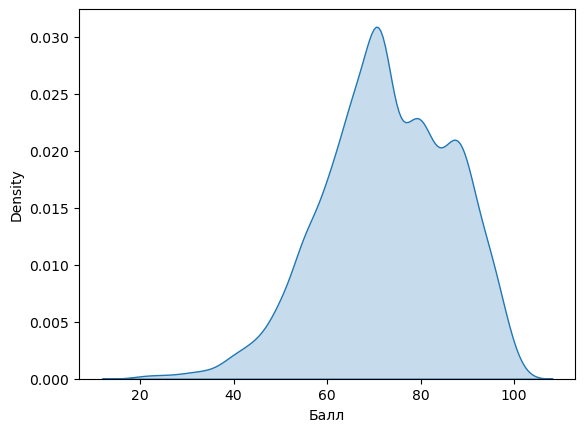

In [24]:
sns.kdeplot(data['Балл'], fill=True)

In [34]:
twop=data[data['Балл']<24].shape[0]/total_students*100
threep=data[(data['Балл']>=24) & (data['Балл']<=50)].shape[0]/total_students*100
fourp=data[(data['Балл']>50) & (data['Балл']<=75)].shape[0]/total_students*100
fivep=data[data['Балл']>75].shape[0]/total_students*100
print(f'Проценты сдавших на: 2-{twop}, 3-{threep}, 4-{fourp}, 5-{fivep}')

Проценты сдавших на: 2-0.13119055428009183, 3-5.510003279763858, 4-50.24598228927517, 5-44.11282387668088


Какое процентное соотношение юношей и девушек писало данный экзамен?

In [37]:
print(data[data['Пол']=='М'].shape[0]/total_students*100)
print(data[data['Пол']=='Ж'].shape[0]/total_students*100)

42.01377500819941
57.953427353230566


Сколько школ принимало участие в экзамене?

In [39]:
data['№ школы'].nunique()

24

In [40]:
data

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,117.0,11,М,341.0,1+++--1+-++---0---------0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
1,2.0,148.0,12А,М,338.0,1+---+0--+---+0----++-+-0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,8.0,20.000000,24.0
2,3.0,152.0,13,Ж,104.0,2-----0--+----1---------1,0(1)0(3)0(1)0(3)0(2)0(2)0(3)1(3)0(2)1(2)1(1)1(1),NaN,9.0,22.000000,24.0
3,4.0,152.0,13,М,104.0,1+--+-0++-----2----++---0,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,9.0,22.000000,24.0
4,5.0,132.0,11,М,337.0,1++---0-+++---1----+----2,0(1)0(3)0(1)0(3)0(2)0(2)0(3)0(3)0(2)0(2)0(1)0(1),NaN,10.0,24.000000,24.0
...,...,...,...,...,...,...,...,...,...,...,...
3044,3045.0,147.0,11,Ж,340.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3045,3046.0,147.0,11,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3046,3047.0,147.0,11,Ж,337.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0
3047,3048.0,144.0,11А,Ж,338.0,2+++++5+++++++2+++++++++4,1(1)3(3)1(1)3(3)2(2)2(2)3(3)3(3)2(2)2(2)1(1)1(1),NaN,58.0,100.000000,24.0


Сколько всего заданий с кратким ответом? С развернутым ответом?

In [47]:
print(25)
print(12)

25
12
